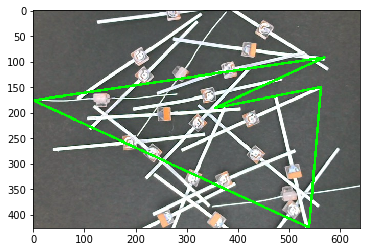

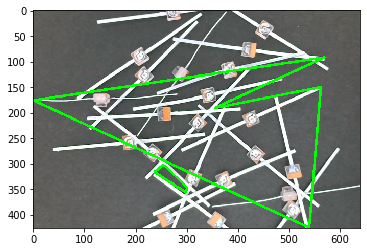

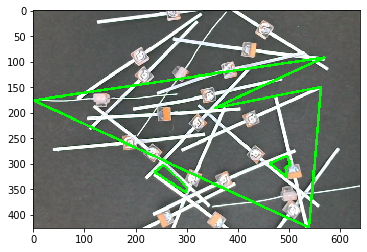

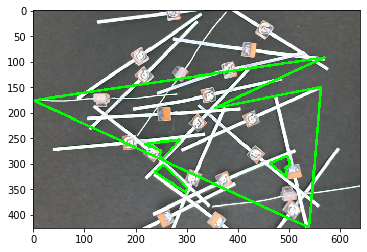

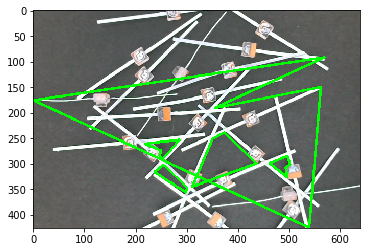

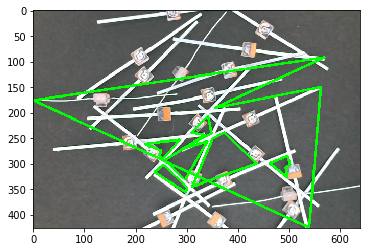

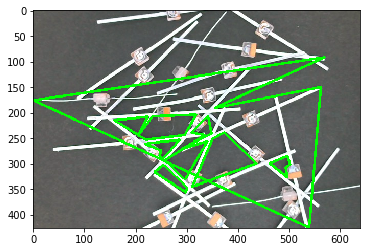

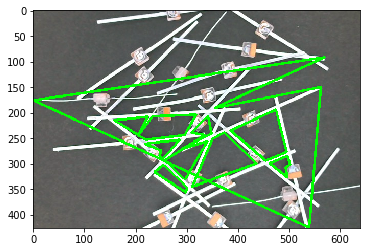

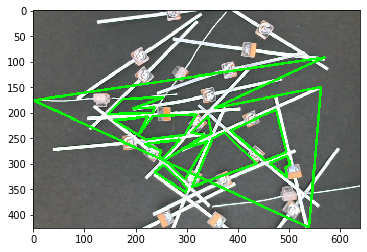

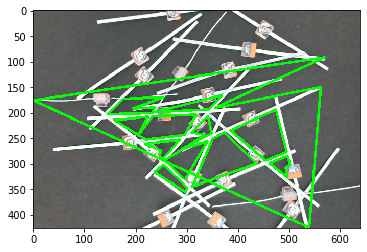

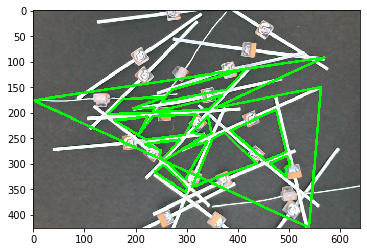

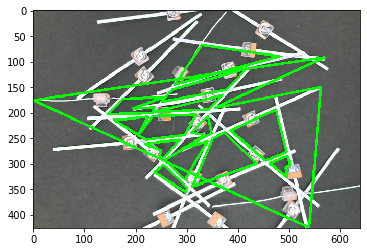

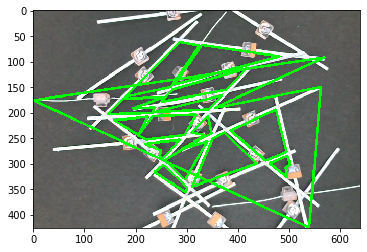

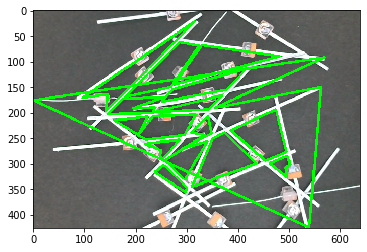

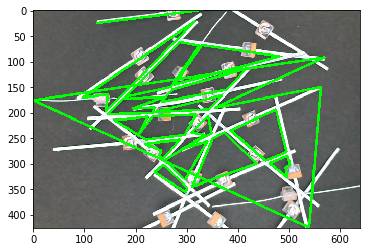

In [11]:
import cv2
#import led_camera
import matplotlib.pyplot as plt
import numpy as np
thresh = 180
max_pixel = 255

size = 50

#myLed = led_camera.ledCamera(camera=False)
img = cv2.imread("./pic1.jpg")

kernel = np.ones((5,5),np.float32)/25
filter_img = cv2.filter2D(img,-1,kernel)

hsv_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2HSV_FULL)  
hsv_img = hsv_img[:,:,2]
#gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


ret,new_hsv = cv2.threshold(hsv_img,thresh,max_pixel,cv2.THRESH_BINARY)
#ret,new_gry = cv2.threshold(gry_img,thresh,max_pixel,cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
                    new_hsv,
                    cv2.RETR_TREE, 
                    cv2.CHAIN_APPROX_SIMPLE
                    )
i = 0
j = 0
for cnt in contours:
    # モーメント
    M = cv2.moments(cnt)
    if M['m00'] < 500:
        continue
    cnt = np.squeeze(cnt,axis=1)
    arclen = cv2.arcLength(cnt, closed=True)
    approx = cv2.approxPolyDP(cnt, epsilon=0.03 * arclen, closed = True).squeeze(axis=1)
    tmp_img = cv2.drawContours(img,[approx],0,(0,255,0),3)
    plt.imshow(tmp_img)
    plt.show()
    
    hell = cv2.convexHull(approx).squeeze(axis=1)
    
    diff_points = set(map(tuple, approx)) - set(map(tuple, hell))
    if len(diff_points) > 0:
        cx, cy = list(diff_points)[0]
    
    
#plt.imshow(img)
plt.show()